# Import Librairies

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import random
import json

# Load & Read Data

In [2]:
with open('dialogue.json') as file:
    data = json.load(file)

In [3]:
sentences = []
labels = []
responses = []

for dialogue in data['dialogue']:
    for input_sentence in dialogue['user']:
        sentences.append(input_sentence)
        labels.append(dialogue['label'])
    responses.append(dialogue['responses'])

In [4]:
label_names = []

for dialogue in data['dialogue']:
    if dialogue['label'] not in label_names:
        label_names.append(dialogue['label'])
        
num_classes = len(label_names)
num_classes

27

# Data Pre-Processing

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
vocab_size = 200
embedding_dim = 16
max_len = 20

## A.Tokenization

In [11]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

In [12]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'can': 4,
 'when': 5,
 'program': 6,
 'what': 7,
 'is': 8,
 'about': 9,
 'course': 10,
 'want': 11,
 'a': 12,
 'semester': 13,
 'my': 14,
 'the': 15,
 'know': 16,
 'how': 17,
 'many': 18,
 'hours': 19,
 'does': 20,
 'why': 21,
 'from': 22,
 'exam': 23,
 'start': 24,
 'fees': 25,
 'take': 26,
 'level': 27,
 'courses': 28,
 'add': 29,
 'absence': 30,
 'final': 31,
 'end': 32,
 'not': 33,
 'finish': 34,
 'complaint': 35,
 'days': 36,
 'you': 37,
 'current': 38,
 'pay': 39,
 'should': 40,
 'graduation': 41,
 "can't": 42,
 'change': 43,
 'college': 44,
 'am': 45,
 'cgpa': 46,
 'for': 47,
 "that's": 48,
 'all': 49,
 'begin': 50,
 'data': 51,
 'be': 52,
 'list': 53,
 'graduate': 54,
 'registration': 55,
 'allowed': 56,
 'required': 57,
 'absent': 58,
 'attend': 59,
 'business': 60,
 'analytics': 61,
 'media': 62,
 'healthcare': 63,
 'think': 64,
 'are': 65,
 'do': 66,
 'new': 67,
 'next': 68,
 'will': 69,
 'paying': 70,
 'register': 71,
 'registeration': 72,
 

## B.Create Sequences

In [13]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[110],
 [111],
 [112],
 [78],
 [113, 37],
 [79, 114, 115],
 [78, 47, 15, 116],
 [117],
 [118, 37, 119],
 [120],
 [48, 49],
 [79, 49],
 [2, 64, 48, 80],
 [2, 64, 48, 49],
 [2, 64, 48, 49, 2, 81],
 [121, 65, 37],
 [7, 65, 37],
 [7, 4, 37, 66],
 [5, 20, 13, 24],
 [5, 20, 15, 67, 13, 24],
 [5, 20, 15, 68, 13, 24],
 [13, 24],
 [5, 20, 13, 50],
 [5, 20, 15, 67, 13, 50],
 [5, 20, 15, 68, 13, 50],
 [13, 50],
 [7, 8, 68, 13, 24, 82],
 [7, 8, 67, 13, 24, 82],
 [5, 20, 13, 32],
 [5, 20, 15, 38, 13, 32],
 [5, 20, 122, 13, 32],
 [13, 32],
 [5, 4, 2, 39, 13, 25],
 [5, 4, 2, 39, 14, 13, 25],
 [5, 4, 2, 39, 123, 25],
 [5, 4, 2, 39, 25],
 [5, 4, 2, 39, 14, 25],
 [5, 69, 70, 25, 24],
 [7, 8, 15, 32, 51, 47, 70, 25],
 [7, 8, 15, 32, 51, 47, 70, 13, 25],
 [5, 8, 15, 124, 23],
 [5, 8, 15, 125, 23],
 [5, 69, 15, 83, 52, 126],
 [5, 69, 15, 83, 24],
 [7, 28, 40, 2, 26],
 [7, 28, 4, 2, 26],
 [127, 28],
 [10, 53],
 [2, 11, 3, 16, 14, 10, 53],
 [41, 128],
 [7, 66, 2, 81, 3, 54],
 [28, 129],
 [28, 130],
 [2, 11,

## C.Padding

In [14]:
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)
padded_sequences

array([[110,   0,   0, ...,   0,   0,   0],
       [111,   0,   0, ...,   0,   0,   0],
       [112,   0,   0, ...,   0,   0,   0],
       ...,
       [  7,   8,  63, ...,   0,   0,   0],
       [  2,  11,   3, ...,   0,   0,   0],
       [  7,   8, 109, ...,   0,   0,   0]])

## D.Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
encoded_labels = np.array(encoded_labels)
encoded_labels

array([14, 14, 14, 25, 25, 25, 25, 12, 12, 12, 12, 12, 12, 12, 12,  0,  0,
        0, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 26, 26,
       26, 26, 26, 26, 26, 26, 19, 19, 19, 19,  6,  6,  6,  6,  6, 13, 13,
       13, 13, 13,  7,  7,  7,  7,  7,  7, 20, 20, 20, 20, 20, 20, 20, 24,
       24, 24, 24,  4,  4,  4,  4,  4,  4,  4, 10, 10, 10, 10, 10, 10,  8,
        8,  8, 21, 21, 21, 21, 21, 21, 16, 16, 16, 16, 16, 16, 16,  3,  3,
        3,  3,  3,  5,  5,  5,  5,  5,  5,  5,  1,  1,  1,  1,  1,  1,  1,
        1, 11, 11, 11, 11, 11, 11, 11,  2,  2,  2,  2, 17, 17, 17, 17, 17,
       17, 18, 18, 18, 18, 15, 15, 15, 15,  9,  9])

# Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout

In [17]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            3200      
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 36)                2340      
                                                                 
 dense_3 (Dense)             (None, 27)                999       
                                                       

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(padded_sequences, encoded_labels, epochs=200).history


Epoch 1/200


5/5 [==============================] - 1s 4ms/step - loss: 3.2956 - accuracy: 0.0408
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2929 - accuracy: 0.0612
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2909 - accuracy: 0.0952
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 3.2882 - accuracy: 0.0952
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2854 - accuracy: 0.0884
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 3.2821 - accuracy: 0.0884
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2780 - accuracy: 0.0748
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2735 - accuracy: 0.0612
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2683 - accuracy: 0.0680
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 3.2623 - accuracy: 0.0748
Epoch 11/200
5/5 [========

5/5 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9796
Epoch 79/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9864
Epoch 80/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.9796
Epoch 81/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9796
Epoch 82/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9796
Epoch 83/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9796
Epoch 84/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9864
Epoch 85/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9864
Epoch 86/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 1.0000
Epoch 87/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9932
Epoch 88/200
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 162/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 163/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 164/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 165/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 167/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 171/200
5/5 [=====

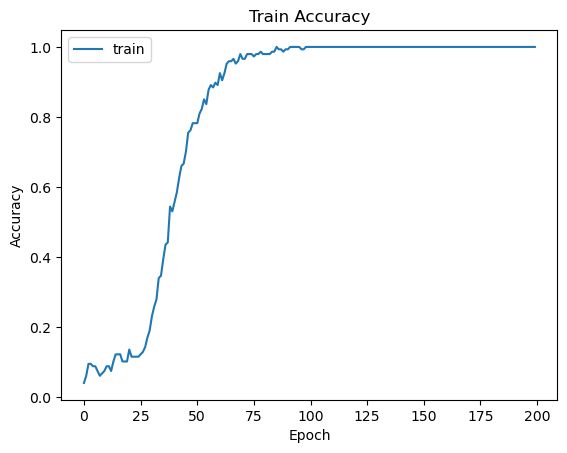

In [19]:
# plot training accuracy
plt.plot(history['accuracy'])
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'])
plt.show()

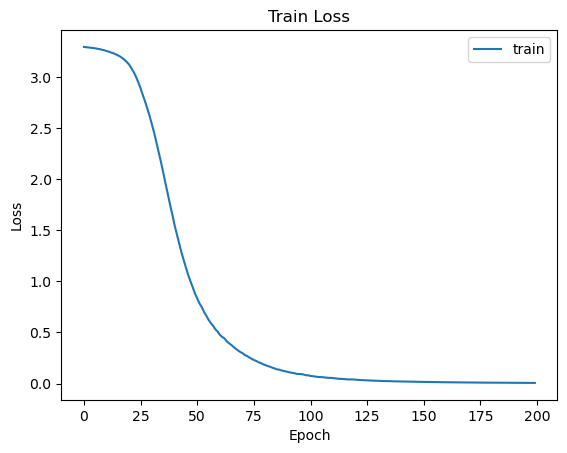

In [20]:
# plot training loss
plt.plot(history['loss'])
plt.title('Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'])
plt.show()

# Chatbot Response

In [21]:
def chatbot_response(user_input):
    
    user_input = user_input.lower()
    sequence = tokenizer.texts_to_sequences([user_input])
    padded_sequence = pad_sequences(sequence, truncating='post', maxlen=max_len)
    predictions = model.predict(padded_sequence)
    label_index = np.argmax(predictions)
    pred_label = encoder.inverse_transform([label_index])[0]
    
    for dialogue in data['dialogue']:
        if dialogue['label'] == pred_label:
            response = np.random.choice(dialogue['responses'])
    return  {'answer':response}

# Save Model

In [ ]:
import pickle

with open('tokenizer.pickle', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('encoder.pickle', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file, protocol=pickle.HIGHEST_PROTOCOL)
    
model.save("assistant_model.h5")